In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,ConfusionMatrixDisplay,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 27.5 MB/s eta 0:00:00


In [2]:
filepath = "/content/telecom_churn.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.shape

(3333, 11)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


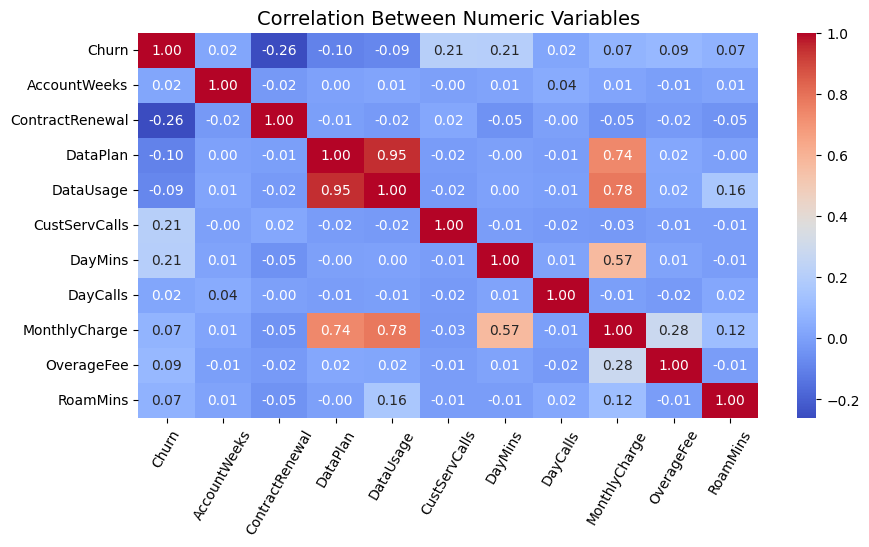

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Numeric Variables", fontsize=14)
plt.xticks(rotation=60)
plt.show()

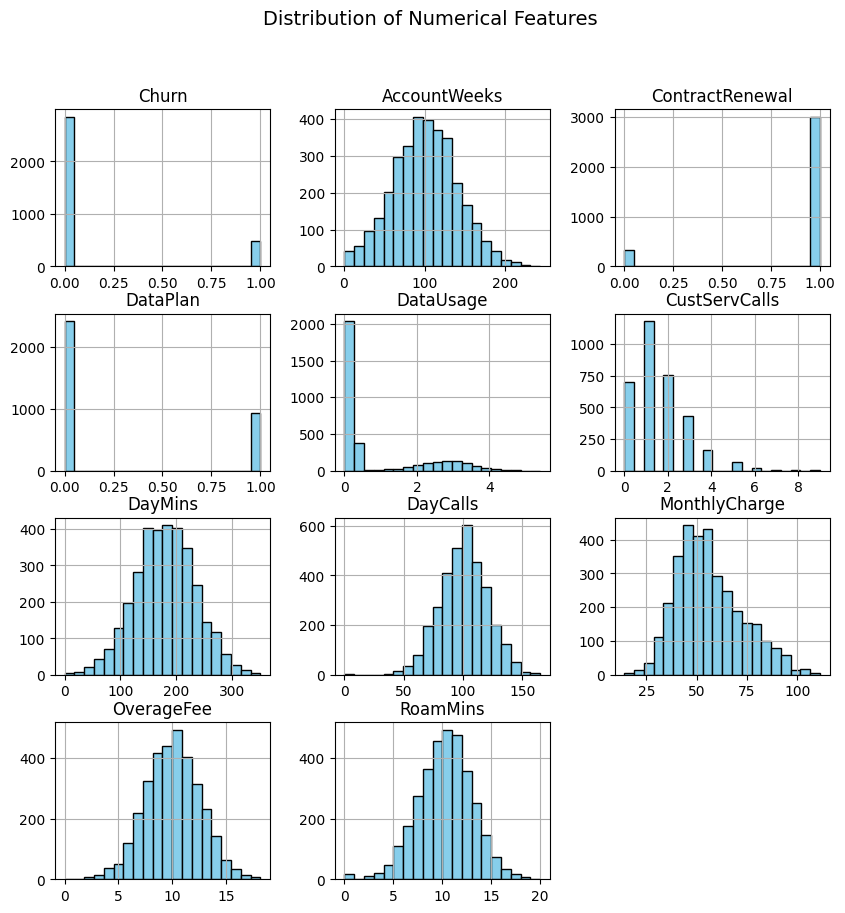

In [9]:
df.hist(figsize=(10, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

In [10]:
df_cat = df.copy()

for cat_col in ["Churn", "DataPlan"]:
    df_cat[cat_col] = list("Yes" if data == 1 else "No" for data in df_cat[cat_col])
    df_cat[cat_col] = df_cat[cat_col].astype("category")

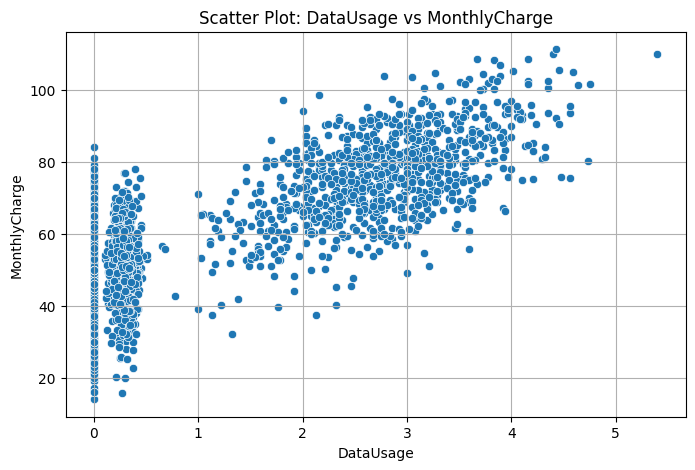

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['DataUsage'], y=df['MonthlyCharge'])
plt.xlabel('DataUsage')
plt.ylabel('MonthlyCharge')
plt.title('Scatter Plot: DataUsage vs MonthlyCharge')
plt.grid(True)
plt.show()

In [12]:
vars_cont = [
    "DataUsage",
    "DayMins",
    "MonthlyCharge",
    "OverageFee",
    "RoamMins"
]

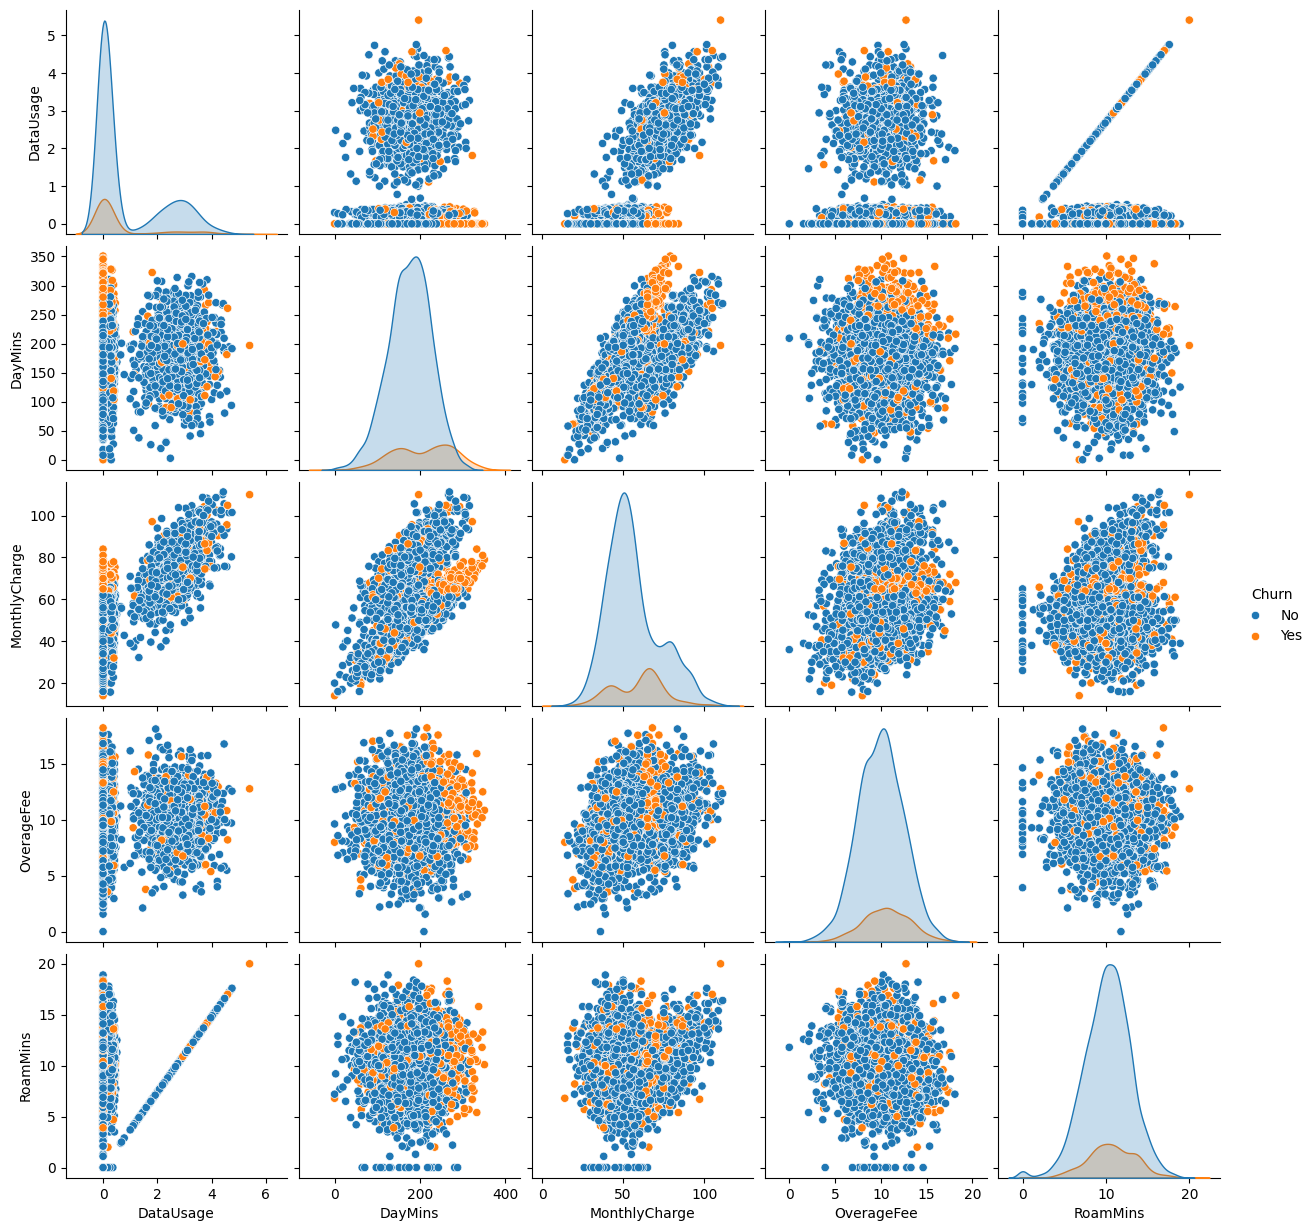

In [13]:
sns.pairplot(data=df_cat,vars=vars_cont,hue="Churn")


In [14]:
cols = ["DayMins","MonthlyCharge","AccountWeeks","DayCalls","OverageFee","RoamMins"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
DayMins,-0.029077
MonthlyCharge,0.594498
AccountWeeks,0.096606
DayCalls,-0.111787
OverageFee,-0.023845
RoamMins,-0.245136


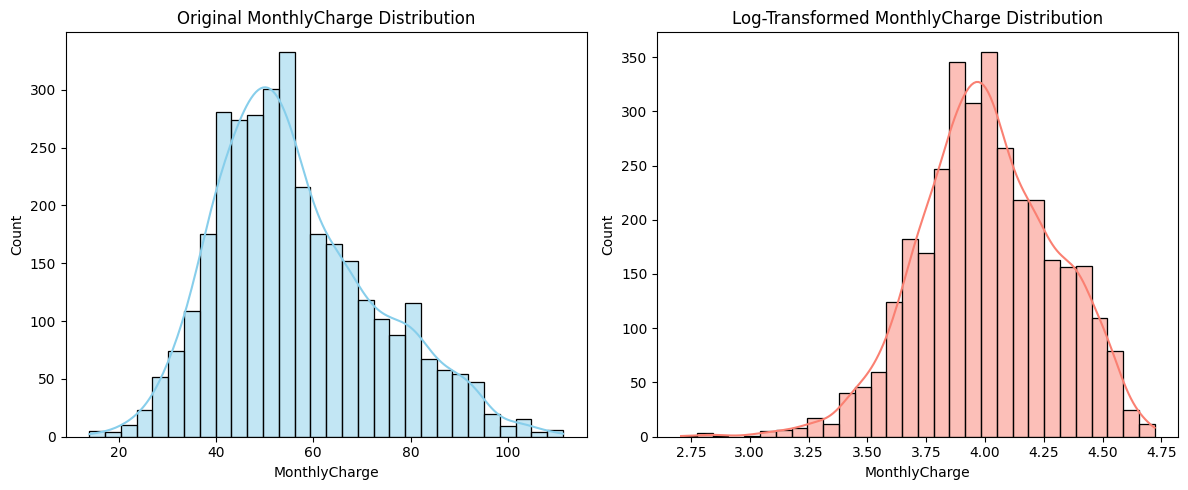

In [15]:
oldMonthlyCharge = df["MonthlyCharge"]
df["MonthlyCharge"] = np.log1p(df["MonthlyCharge"])
plt.figure(figsize=(12, 5))

# Plot original MonthlyCharge distribution
plt.subplot(1, 2, 1)
sns.histplot(oldMonthlyCharge, kde=True, bins=30, color="skyblue")
plt.title("Original MonthlyCharge Distribution")


# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df["MonthlyCharge"], kde=True, bins=30, color="salmon")
plt.title("Log-Transformed MonthlyCharge Distribution")

plt.tight_layout()
plt.show()

In [16]:
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df['Churn'].value_counts()


,count
Churn,
0,2850
1,483


In [17]:
X = df.drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True)
smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)
y_train_resampled.value_counts().to_frame()

,count
Churn,
0,2280
1,2280


In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# TRAIN ALL MODELS
# -------------------------------------------------------

print("Training individual base models...")

base_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

base_results = {}
base_preds = {}

for name, model in base_models.items():
    print(f"Training {name}...")

    # FIXED VARIABLE NAMES
    model.fit(X_train_resampled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        preds = model.predict_proba(X_test)[:, 1]
    else:
        preds = model.predict(X_test)

    base_preds[name] = preds
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    base_results[name] = rmse

# ---------------------------
# STACKING MODEL (FIXED)
# ---------------------------
print("\nTraining Stacking Ensemble...")
estimationrs = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
]

stack_model = StackingClassifier(
    estimators=estimationrs,
    final_estimator=LogisticRegression(),
    cv=3,
    n_jobs=-1
)

# FIXED
stack_model.fit(X_train_resampled, y_train_resampled)
stack_preds = stack_model.predict_proba(X_test)[:, 1]
stack_rmse = np.sqrt(mean_squared_error(y_test, stack_preds))

base_preds["Stacking Ensemble"] = stack_preds
base_results["Stacking Ensemble"] = stack_rmse

Training individual base models...
Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...

Training Stacking Ensemble...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:50:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training individual base models...
Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...

Training Stacking Ensemble...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:27:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


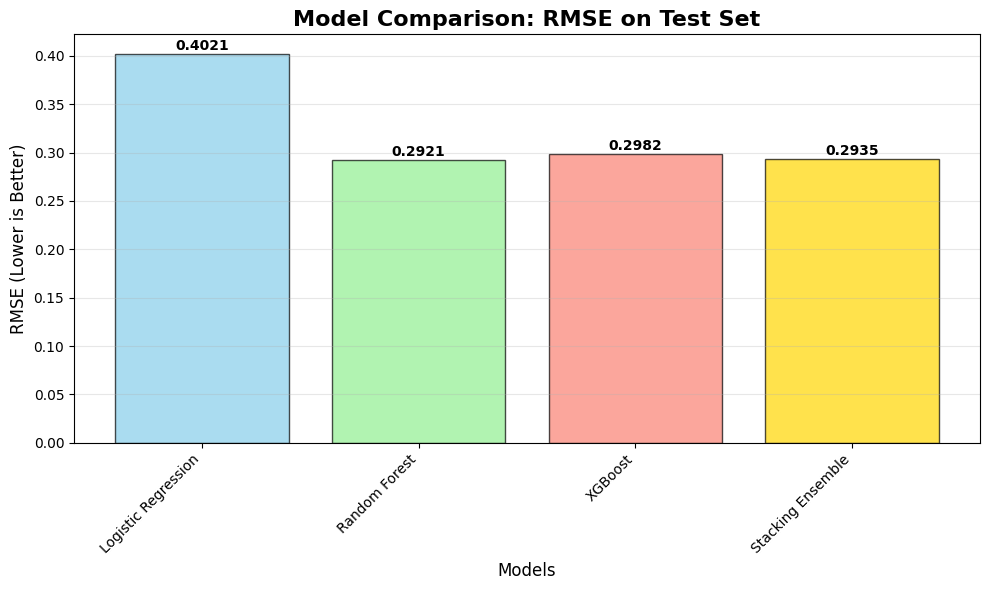

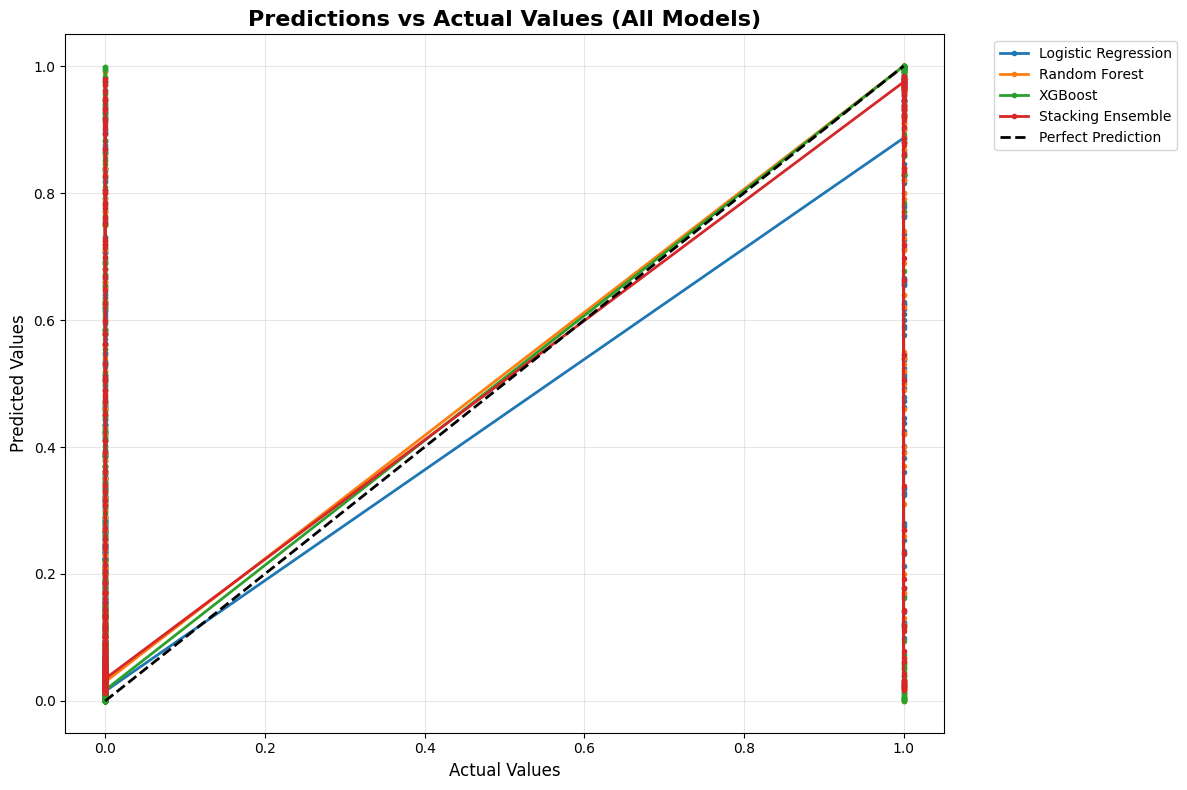


FINAL RESULTS COMPARISON
Logistic Regression : RMSE = 0.4021
Random Forest       : RMSE = 0.2921
XGBoost             : RMSE = 0.2982
Stacking Ensemble   : RMSE = 0.2935

 BEST MODEL: Random Forest (RMSE: 0.2921)


In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# TRAIN ALL MODELS
# -------------------------------------------------------

print("Training individual base models...")

# Base models (same as your baseline section)
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

base_results = {}
base_preds = {}

for name, model in base_models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        preds = model.predict_proba(X_test)[:, 1]
    else:
        preds = model.predict(X_test)

    base_preds[name] = preds
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    base_results[name] = rmse

# Stacking Ensemble
print("\nTraining Stacking Ensemble...")
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=3,
    n_jobs=-1
)

stack_model.fit(X_train_resampled, y_train_resampled)
stack_preds = stack_model.predict_proba(X_test)[:, 1]
stack_rmse = np.sqrt(mean_squared_error(y_test, stack_preds))

# Store ensemble
base_preds["Stacking Ensemble"] = stack_preds
base_results["Stacking Ensemble"] = stack_rmse

# -------------------------------------------------------
# 1. BAR CHART: RMSE Comparison
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

models = list(base_results.keys())
rmse_values = list(base_results.values())

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple']
bars = plt.bar(models, rmse_values, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, rmse in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title("Model Comparison: RMSE on Test Set", fontsize=16, fontweight='bold')
plt.ylabel("RMSE (Lower is Better)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 2. LINE PLOT: Predictions vs Actual
# -------------------------------------------------------
plt.figure(figsize=(12, 8))

# Sort by actual values for smoother lines
y_test_np = y_test.values
sort_idx = np.argsort(y_test_np)
actual_sorted = y_test_np[sort_idx]

for model_name, preds in base_preds.items():
    preds_sorted = preds[sort_idx]
    plt.plot(actual_sorted, preds_sorted, 'o-', label=model_name, markersize=3, linewidth=2)

# Perfect prediction line
max_val = max(np.max(y_test_np), np.max(list(base_preds.values())[0]))
plt.plot([0, max_val], [0, max_val], 'k--', label='Perfect Prediction', linewidth=2)

plt.title("Predictions vs Actual Values (All Models)", fontsize=16, fontweight='bold')
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 3. SUMMARY TABLE
# -------------------------------------------------------
print("\n" + "="*60)
print("FINAL RESULTS COMPARISON")
print("="*60)
for model, rmse in base_results.items():
    print(f"{model:20s}: RMSE = {rmse:.4f}")
print("="*60)

best_model = min(base_results, key=base_results.get)
print(f"\n BEST MODEL: {best_model} (RMSE: {base_results[best_model]:.4f})")

In [41]:
import pickle

pickle.dump(best_model, open("final_model.pkl", "wb"))



In [43]:
from google.colab import files
files.download("final_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import joblib
joblib.dump(best_model, "final_model.pkl")


['final_model.pkl']

In [45]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

model = joblib.load("final_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    features = np.array(data["features"]).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"prediction": int(prediction)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [46]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import numpy as np
import joblib

app = FastAPI()

# Load trained model (must be saved as a fitted model or pipeline)
model = joblib.load("final_model.pkl")


class Input(BaseModel):
    features: List[float]  # list of numeric features, length must match training


@app.post("/predict")
def predict(data: Input):
    # Convert to 2D array
    x = np.array(data.features, dtype=float).reshape(1, -1)

    # If model supports probabilities, return both
    if hasattr(model, "predict_proba"):
        proba = float(model.predict_proba(x)[0, 1])
        pred = int(proba >= 0.5)
        return {"prediction": pred, "probability_churn": proba}
    else:
        pred = int(model.predict(x)[0])
        return {"prediction": pred}


In [30]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.4 MB/s eta 0:00:00


In [47]:
from pyngrok import ngrok
ngrok.set_auth_token("36jwL5rXZ3ENHUF5xqnX4Lt2xDD_SmE7y41mQdGBS857gKN2")


In [48]:
%%writefile streamlit_app.py
import streamlit as st
import numpy as np
import joblib

model = joblib.load("final_model.pkl")

st.title("Telecom Customer Churn Prediction")

inputs = []

st.write("Enter customer features:")

for i in range(10):  # update based on your feature count
    val = st.number_input(f"Feature {i+1}", value=0.0)
    inputs.append(val)

if st.button("Predict"):
    x = np.array(inputs).reshape(1, -1)
    pred = model.predict(x)[0]
    st.success(f"Prediction: {int(pred)}")


Overwriting streamlit_app.py


In [49]:
!streamlit run streamlit_app.py &>/dev/null&


In [57]:
import joblib

# Replace this with your actual best model variable name
best_model = stack_model   # or rf_model or xgb_model etc.

joblib.dump(best_model, "final_model.pkl")
print("Model saved successfully!")
m = joblib.load("final_model.pkl")
print(type(m))


Model saved successfully!
<class 'sklearn.ensemble._stacking.StackingClassifier'>


In [58]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://irruptively-unparching-kasey.ngrok-free.dev" -> "http://localhost:8501">